In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
f = pd.read_csv('Car_Purchasing_Data.csv')

In [5]:
f.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,USA,0,42,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,USA,0,41,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,USA,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,USA,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,USA,1,57,59729.15130,5358.712177,560304.0671,55915.46248


In [6]:
f.describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,500.0,0.506000,0.500465,0.0,0.000000,1.000000,1.000000,1.0
Age,500.0,46.224000,7.990339,20.0,41.000000,46.000000,52.000000,70.0
Annual Salary,500.0,62127.239608,11703.378228,20000.0,54391.977195,62915.497035,70117.862005,100000.0
Credit Card Debt,500.0,9607.645049,3489.187973,100.0,7397.515792,9655.035568,11798.867487,20000.0
Net Worth,500.0,431475.713625,173536.756340,20000.0,299824.195900,426750.120650,557324.478725,1000000.0
Car Purchase Amount,500.0,44209.799218,10773.178744,9000.0,37629.896040,43997.783390,51254.709517,80000.0


In [7]:
f.columns

Index(['Customer Name', 'Customer e-mail', 'Country', 'Gender', 'Age',
       'Annual Salary', 'Credit Card Debt', 'Net Worth',
       'Car Purchase Amount'],
      dtype='object')

In [8]:
f.duplicated().sum()

0

In [9]:
f.shape

(500, 9)

In [10]:
f.isnull().sum()

Customer Name          0
Customer e-mail        0
Country                0
Gender                 0
Age                    0
Annual Salary          0
Credit Card Debt       0
Net Worth              0
Car Purchase Amount    0
dtype: int64

In [11]:
''' get all categorical columns in the dataframe and hot encode them
'''
catCols = [col for col in f.columns if f[col].dtype=="O"]

from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()

for item in catCols:
    f[item] = lb_make.fit_transform(f[item])

In [12]:
f.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,288,139,0,0,42,62812.09301,11609.380910,238961.2505,35321.45877
1,168,224,0,0,41,66646.89292,9572.957136,530973.9078,45115.52566
2,311,498,0,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,204,307,0,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,70,241,0,1,57,59729.15130,5358.712177,560304.0671,55915.46248


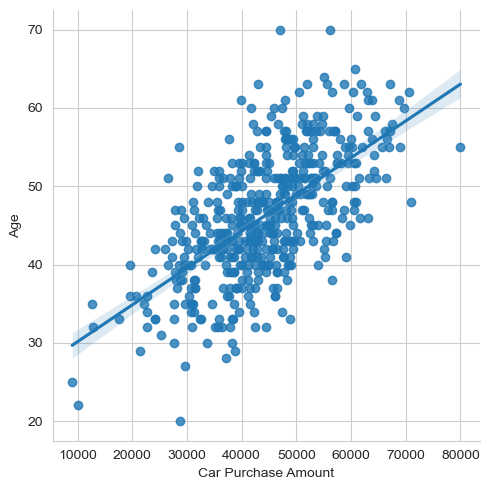

In [24]:
import seaborn as sns
sns.set_style('whitegrid')
sns.lmplot(x ='Car Purchase Amount', y ='Age', data = f)

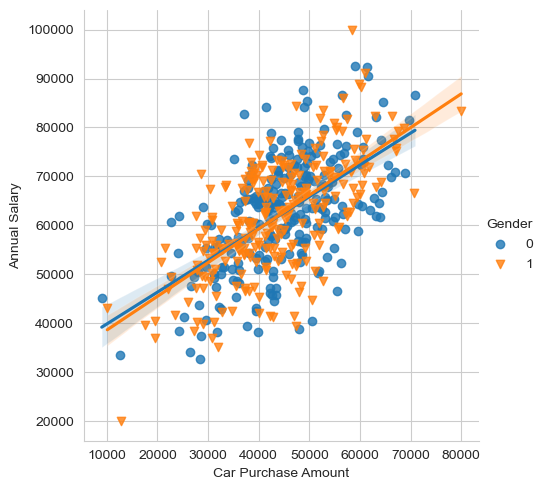

In [34]:
sns.set_style('whitegrid')
sns.lmplot(x ='Car Purchase Amount', y ='Age', data = f, 
           hue ='Gender', markers =['o', 'v'])

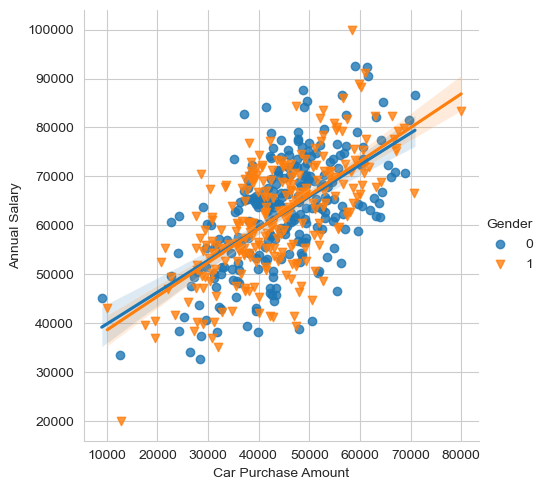

In [35]:
sns.set_style('whitegrid')
sns.lmplot(x ='Car Purchase Amount', y ='Annual Salary', data = f, 
           hue ='Gender', markers =['o', 'v'])

## Model Started

In [145]:
X = f['Annual Salary']
y = f['Car Purchase Amount']

In [146]:
import random
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [147]:
X_train.shape, y_train.shape


((400,), (400,))

In [148]:
def mean_square_error(y_train, y_pred):
    cost = np.sum(((y_train - y_pred)**2)/len(y_train))
    return cost

In [149]:
'''
Compute line parameters from training data. 
Compute 'm' and 'c' of line by formula given in the above equations.
a-hat is c and b-hat is m in equation y = mx + c
'''
# YOUR CODE HERE

x_train_mean = np.mean(X_train)
y_train_mean = np.mean(y_train)

t = np.sum((X_train-x_train_mean)*(y_train-y_train_mean))
d = np.sum((X_train-x_train_mean)*(X_train-x_train_mean))

slope = t/d
intercept = y_train_mean - slope*x_train_mean

y_pred_train = (slope * X_train) + intercept


y_pred_test = (slope * X_test) + intercept

In [150]:
mean_square_error(y_train, y_pred_train)

71855297.93701696